<a href="https://colab.research.google.com/github/sushmitasardar/Tesla-code-EDA-project.1/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# Importing required packages for data cleaning and manipulation

In [64]:
# importing pandas library
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [65]:
# drive mounting
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing dataset 

In [66]:
# Importing the dataset
file_path = '/content/drive/MyDrive/capstone project/Copy of Hotel Bookings.csv'
hotel_df = pd.read_csv(file_path)

# Data Exploration

In [67]:
# checking the number of rows and columns
hotel_df.shape

(119390, 32)

In [68]:
# checking the rows
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [69]:
# Looking for the data tpye non null entries
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Data Cleaning

In [70]:
hotel_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [71]:
# Defining the data
df= hotel_df.copy()

In [72]:
# Replacing the null with 0
null_columns=['agent','children','company']
for colm in null_columns:
  df[colm].fillna(0,inplace=True)

In [73]:
# Checking if all the null values are removed
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
company                             0
days_in_waiting_list                0
customer_typ

In [74]:
# Replacing the nan values with other
df['country'].fillna('others',inplace=True)

In [75]:
# Checking if all the na values are removed
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [76]:
# checking for the duplicate rows
df.duplicated().value_counts()  # true means duplicate rows

False    87396
True     31994
dtype: int64

In [77]:
# Dropping the duplicate rows from the dataset
df= df.drop_duplicates()

In [78]:
df.shape

(87396, 32)

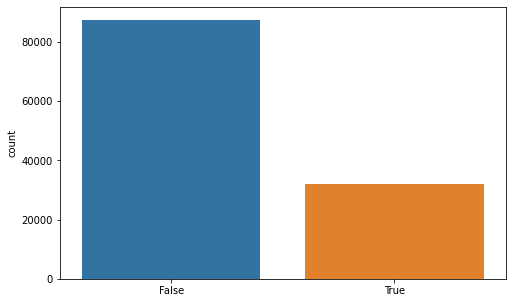

In [79]:
# Visulizing through Count pot
plt.figure(figsize=(8,5))
sns.countplot(x=hotel_df.duplicated())

There are  31994 duplicate rows in the **data**. We need to drop the duplicate rows from the data

# EXPLORATARY DATA ANALYSIS

1.Which hotel has high chance that its customer will return for another stay?

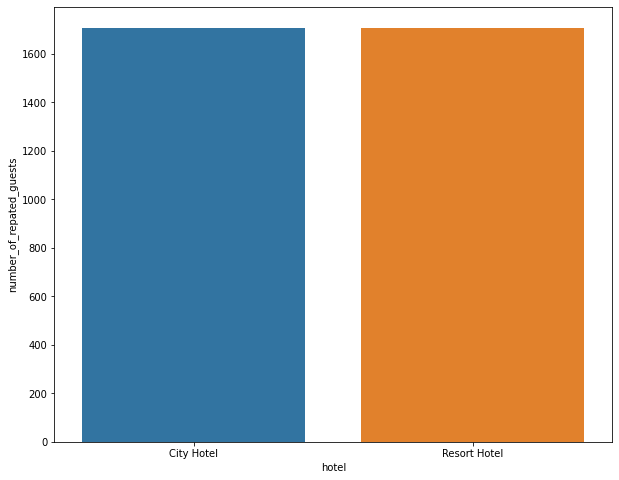

In [80]:
# repeated guest=1
#not repeated guest=0
#groupby hotel
repeated_guests_df=df[df['is_repeated_guest']==1].groupby('hotel').size().reset_index().rename(columns={0:'number_of_repated_guests'})



#set plot size adn plot barplot
plt.figure(figsize=(10,8))
sns.barplot(x=repeated_guests_df['hotel'],y=repeated_guests_df['number_of_repated_guests'])




* From the above bar graph we can see it is almost similar for both hotels but Resort Hotel has slightly more repeated guest than City Hotel




2.Which hotel have the maximum number of bookings?

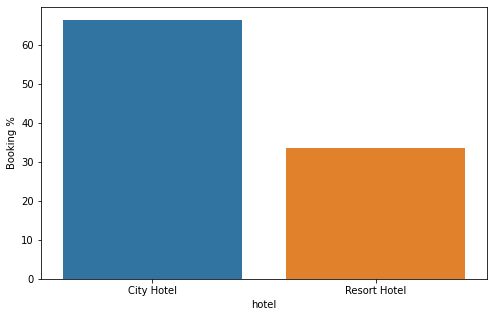

In [81]:
# Calculating the percentage of booking in each hotel
grouped_by_hotel = hotel_df.groupby('hotel')
d1 = pd.DataFrame((grouped_by_hotel.size()/hotel_df.shape[0])*100).reset_index().rename(columns = {0:'Booking %'})      
plt.figure(figsize = (8,5))
sns.barplot(x = d1['hotel'], y = d1['Booking %'] )
plt.show()



* From above graph we can see that city hotel have maximum number of booking than Resort hotel



3.Which agent makes most of the number of booking?

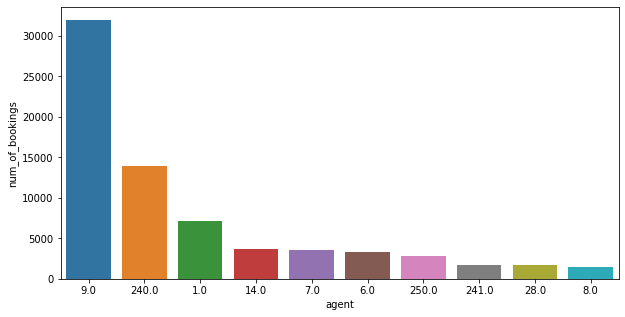

In [82]:
# Checking which agent makes the most numbers of booking
d1 = pd.DataFrame(hotel_df['agent'].value_counts()).reset_index().rename(columns = {'index':'agent','agent':'num_of_bookings'}).sort_values(by = 'num_of_bookings', ascending = False)
d1.drop(d1[d1['agent'] == 0].index, inplace = True)            # 0 represents that booking is not made by an agent
d1 = d1[:10]                                                   # Selecting top 10 performing agents
plt.figure(figsize = (10,5))
sns.barplot(x = 'agent', y = 'num_of_bookings', data = d1, order = d1.sort_values('num_of_bookings', ascending = False).agent)



* From the above bar graph, we see that agent number 9 makes the most of the booking




Text(0.5, 1.0, 'Cancellation and non Cancellation')

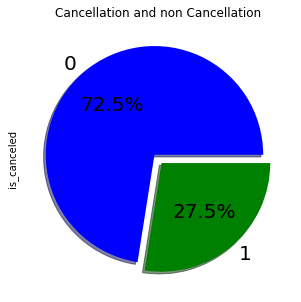

In [83]:
# Calculating the percentage of cancellation
colors = ['blue','green']
df['is_canceled'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, colors=colors, figsize=(10,5),fontsize=20)
plt.title("Cancellation and non Cancellation")




* From the above piechart we see that:-

  0 = Non cancelled
  1 = cancelled

  27.5 % is cancelled

